<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine the relative popularity of R compared to other programming languages.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [70]:
# Load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load the dataset
import pandas as pd
data = pd.read_csv("stack_overflow_data.csv")

In [72]:
# View the dataset
print(data.head())
print(data.info())
print(data.shape)
print(data.isnull().sum())
print(data['tag'].isnull())

   year              tag  num_questions  year_total
0  2008         treeview             69      168541
1  2008  scheduled-tasks             30      168541
2  2008   specifications             21      168541
3  2008        rendering             35      168541
4  2008        http-post              6      168541
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420066 entries, 0 to 420065
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   year           420066 non-null  int64 
 1   tag            420040 non-null  object
 2   num_questions  420066 non-null  int64 
 3   year_total     420066 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 12.8+ MB
None
(420066, 4)
year              0
tag              26
num_questions     0
year_total        0
dtype: int64
0         False
1         False
2         False
3         False
4         False
          ...  
420061    False
420062    False
420063    False
420064   

In [73]:
# Start coding here
# Use as many cells as you like!

In [74]:
qs_2020 = data[data['year'] == 2020]
r_mentioned_2020 = qs_2020[qs_2020['tag'] == 'r']
r_mentioned_2020['percentage'] = (r_mentioned_2020['num_questions'] / r_mentioned_2020['year_total']) * 100
print(r_mentioned_2020)

        year tag  num_questions  year_total  percentage
400453  2020   r          52662     5452545    0.965824


          tag  num_questions
0  javascript        1373634
1      python        1187838
2        java         982747
3     android         737330
4          c#         730045


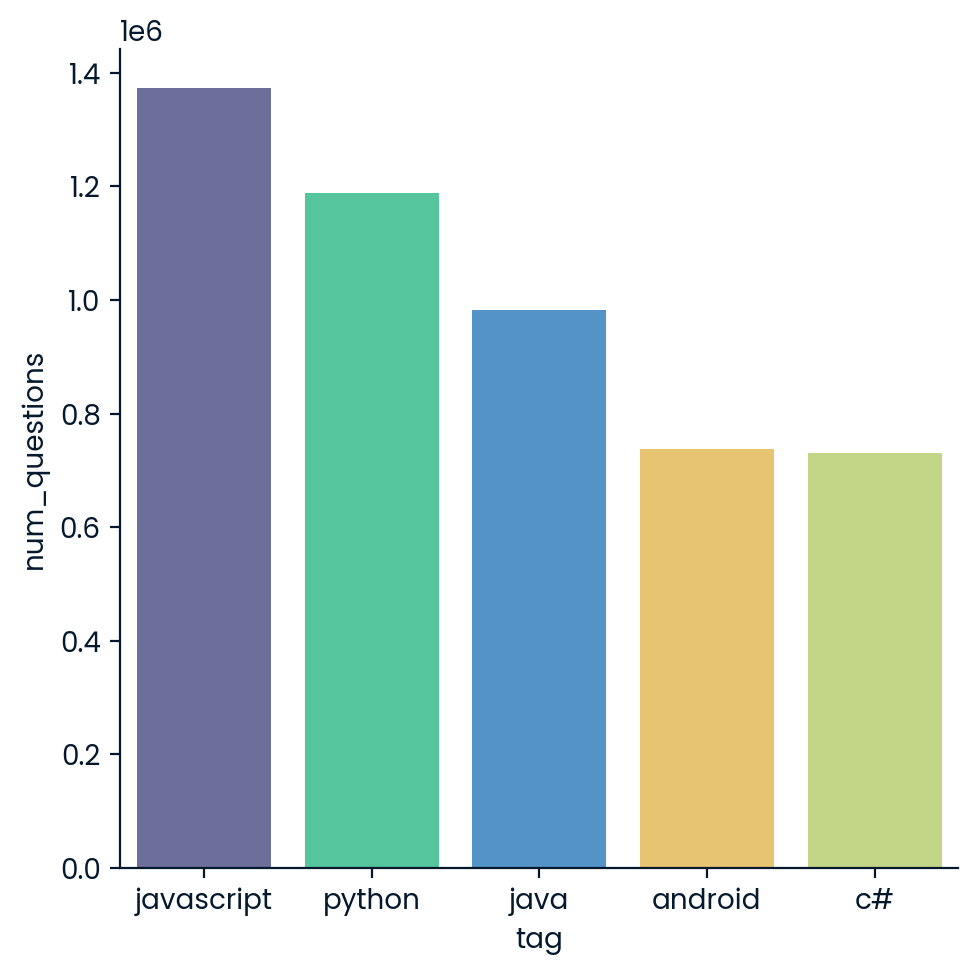

In [108]:
#first we zoom into the range 2015-2025
qs_2015_2020 = data[(data['year'] >= 2015) & (data['year'] <= 2020)]
qs_2015_2020['tag'] = qs_2015_2020['tag'].astype(str)

#now lets group the tag topics so we can find the total num questions per topic (we don't care about year since we got out range)
qs_2015_2020.drop(labels=['year', 'year_total'], axis=1, inplace=True) #drop unnecessary stuff
tag_totals = qs_2015_2020.groupby(by='tag', sort=False).sum()
tag_totals = tag_totals.sort_values(by='num_questions', ascending=False)

highest_tags = tag_totals.iloc[0:5]
highest_tags = highest_tags.reset_index()
print(highest_tags)

sns.catplot(x=highest_tags['tag'],y=highest_tags['num_questions'], kind='bar', hue=highest_tags['tag'])
plt.show()


